**Step1:Prepare a CSV file with comments or statements**

**Step 2:Upload CSV file**

In [ ]:
from google.colab import files 
uploaded = files.upload()
filename = next(iter(uploaded))
filename


Saving bookPNL.csv to bookPNL.csv


'bookPNL.csv'

**Step 3: Read the file**

In [ ]:
import pandas as pd
def load_housing_data(filename=filename):
   return pd.read_csv(filename)

In [ ]:
DataF=load_housing_data(filename)
DataF
#DataF['Comments']

,code,Comments
0,1,First copy started loosing pages from the firs...
1,2,B/W edition...the feel of the pages of an auth...
2,3,Love the book but not sure why it’s in black a...
3,4,It covers a lot of subjects but very superfici...
4,5,".. the word ""practical"" in the title might mak..."
5,6,This book is an introduction on how to apply N...
6,7,"As a new starter in NLP, I found this book ver..."
7,8,"I've only finished the first chapter, but the ..."
8,9,Lots of information and fun to read.
9,10,The authors intent this book to be for anyone ...


**Step 4: calculate Polarity and create a column with its value**

In [ ]:
from textblob import TextBlob
def getPolar(text):
  return TextBlob(text).sentiment.polarity

DataF['Polarity']=DataF['Comments'].apply(getPolar)

DataF


,code,Comments,Polarity
0,1,First copy started loosing pages from the firs...,0.255556
1,2,B/W edition...the feel of the pages of an auth...,0.150000
2,3,Love the book but not sure why it’s in black a...,0.020833
3,4,It covers a lot of subjects but very superfici...,0.055556
4,5,".. the word ""practical"" in the title might mak...",0.480000
5,6,This book is an introduction on how to apply N...,0.054750
6,7,"As a new starter in NLP, I found this book ver...",0.245671
7,8,"I've only finished the first chapter, but the ...",-0.125000
8,9,Lots of information and fun to read.,0.300000
9,10,The authors intent this book to be for anyone ...,0.250000


**Step 5: Get positive, negative , neutral analysis**

In [ ]:
def getPolarAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
DataF['PolarAnalysis']=DataF['Polarity'].apply(getPolarAnalysis)
DataF

,code,Comments,Polarity,PolarAnalysis
0,1,First copy started loosing pages from the firs...,0.255556,Positive
1,2,B/W edition...the feel of the pages of an auth...,0.150000,Positive
2,3,Love the book but not sure why it’s in black a...,0.020833,Positive
3,4,It covers a lot of subjects but very superfici...,0.055556,Positive
4,5,".. the word ""practical"" in the title might mak...",0.480000,Positive
5,6,This book is an introduction on how to apply N...,0.054750,Positive
6,7,"As a new starter in NLP, I found this book ver...",0.245671,Positive
7,8,"I've only finished the first chapter, but the ...",-0.125000,Negative
8,9,Lots of information and fun to read.,0.300000,Positive
9,10,The authors intent this book to be for anyone ...,0.250000,Positive


**Step6: Display the Polarity analysis**

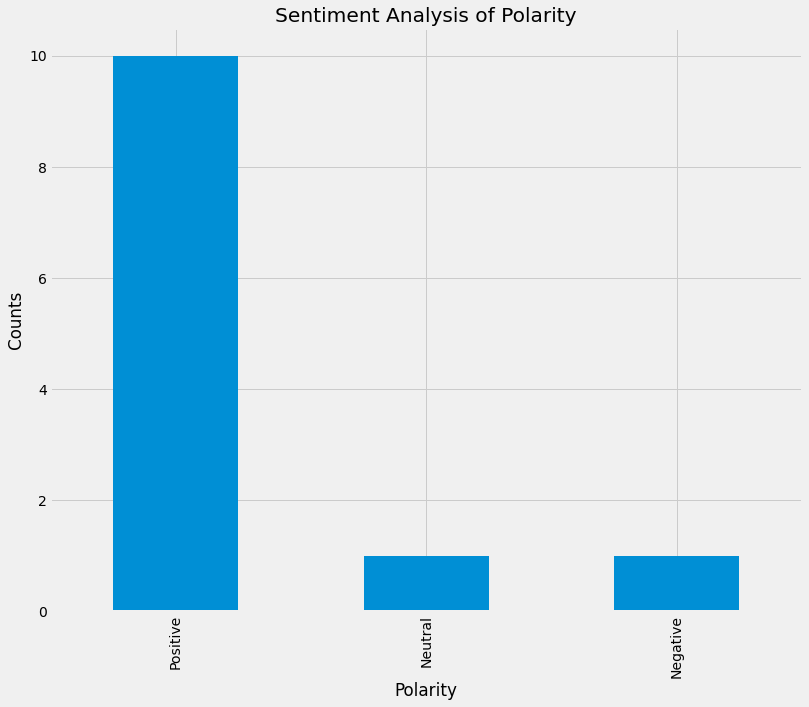

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title('Sentiment Analysis of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Counts')
DataF['PolarAnalysis'].value_counts().plot(kind='bar')
plt.show
plt.savefig('polarity.png')

## **Subjectivity**

**Step 7: calculate Subjectivity and create a column with its value**

In [ ]:
def getSubj(text):
  return TextBlob(text).sentiment.subjectivity
DataF['Subjectivity']=DataF['Comments'].apply(getSubj)
DataF

,code,Comments,Polarity,PolarAnalysis,Subjectivity
0,1,First copy started loosing pages from the firs...,0.255556,Positive,0.470833
1,2,B/W edition...the feel of the pages of an auth...,0.150000,Positive,0.400000
2,3,Love the book but not sure why it’s in black a...,0.020833,Positive,0.480556
3,4,It covers a lot of subjects but very superfici...,0.055556,Positive,0.611111
4,5,".. the word ""practical"" in the title might mak...",0.480000,Positive,0.645000
5,6,This book is an introduction on how to apply N...,0.054750,Positive,0.341500
6,7,"As a new starter in NLP, I found this book ver...",0.245671,Positive,0.610967
7,8,"I've only finished the first chapter, but the ...",-0.125000,Negative,0.595833
8,9,Lots of information and fun to read.,0.300000,Positive,0.200000
9,10,The authors intent this book to be for anyone ...,0.250000,Positive,0.500000


**Step 8: Display Sentiment Analysis**


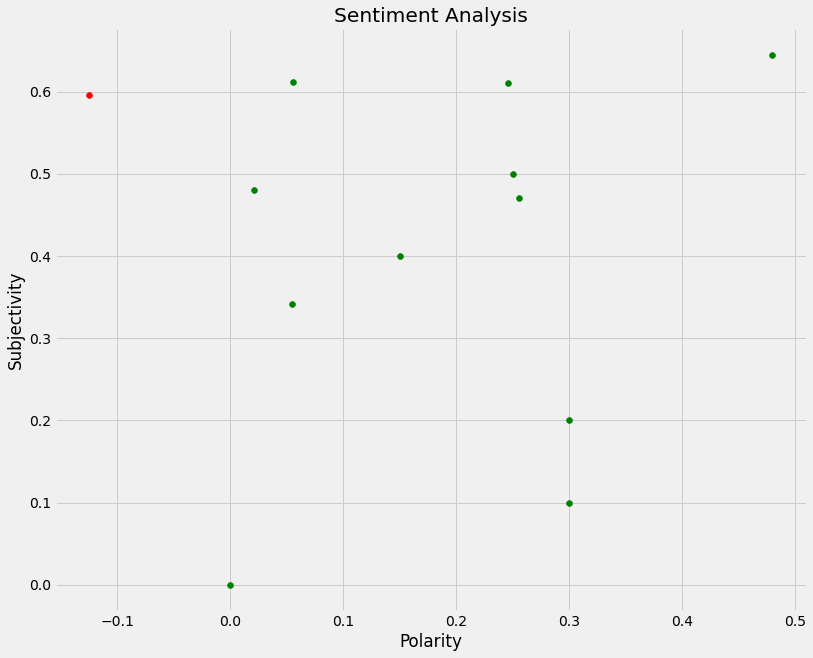

In [ ]:
plt.figure(figsize=(12,10))
for i in range(0,DataF.shape[0]):
  if (DataF['Polarity'][i] <0):
    plt.scatter(DataF['Polarity'][i],DataF['Subjectivity'][i], color='Red')
  else:
    plt.scatter(DataF['Polarity'][i],DataF['Subjectivity'][i], color='Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.savefig('SA1.png')
plt.show()


## **Topic Modeling**

**Step 9: Data cleaning**


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
DataF['Comments_clean']=DataF['Comments'].apply(clean)
DataF['Comments_clean']

0     [first, copy, started, loosing, page, first, r...
1     [bw, editionthe, feel, page, authentic, rielly...
2     [love, book, sure, it’s, black, white, image, ...
3     [cover, lot, subject, superficially, us, almos...
4     [word, practical, title, might, make, think, w...
5     [book, introduction, apply, nlp, industrial, s...
6     [new, starter, nlp, found, book, helpful, auth...
7     [ive, finished, first, chapter, quality, writi...
8                         [lot, information, fun, read]
9     [author, intent, book, anyone, interested, wor...
10    [others, mentioned, kindle, version, horrrrrri...
11    [ordered, part, business, analytics, course, m...
Name: Comments_clean, dtype: object

**Step 10: Create dictionary and term matrix**

In [ ]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
dictionary = corpora.Dictionary(DataF['Comments_clean'])
term_matrix = [dictionary.doc2bow(doc) for doc in DataF['Comments_clean'] ]

In [ ]:
print(dictionary.num_nnz)

231


In [ ]:
print(len(term_matrix))

12


In [ ]:
term_matrix

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(16, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(2, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)],
 [(2, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(2, 1),
  (17, 1),
  (48, 1),
  (54, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),


**Step 11:Latent Dirichlet allocation (LDA)**

In [ ]:
lda = gensim.models.ldamodel.LdaModel

In [ ]:
num_topics=2
%time ldamodel = lda(term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

CPU times: user 370 ms, sys: 14.3 ms, total: 384 ms
Wall time: 368 ms


https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.036*"book" + 0.012*"reading" + 0.012*"work" + 0.012*"field" + 0.012*"nlp" + 0.012*"author" + 0.007*"worth" + 0.007*"almost" + 0.007*"level" + 0.007*"get"'),
 (1,
  '0.035*"book" + 0.027*"nlp" + 0.011*"first" + 0.011*"page" + 0.010*"end" + 0.010*"easily" + 0.010*"give" + 0.010*"like" + 0.010*"especially" + 0.010*"loosing"')]

**Step 12: Display Topics Map Using LDAvis**

In [ ]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim 
lda_display = pyLDAvis.gensim.prepare(ldamodel, term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)


**Step 13: Assign the topics to the statements (corpus)**

In [ ]:
lda_corpus = ldamodel[term_matrix]
[doc for doc in lda_corpus]

[[(0, 0.01847697), (1, 0.98152304)],
 [(0, 0.9447996), (1, 0.055200405)],
 [(0, 0.937978), (1, 0.062022015)],
 [(0, 0.023130732), (1, 0.9768693)],
 [(0, 0.0179908), (1, 0.98200923)],
 [(0, 0.99138504), (1, 0.0086149955)],
 [(0, 0.01106158), (1, 0.9889384)],
 [(0, 0.94481105), (1, 0.055188894)],
 [(0, 0.87647784), (1, 0.123522185)],
 [(0, 0.9236009), (1, 0.076399125)],
 [(0, 0.05484683), (1, 0.9451531)],
 [(0, 0.9226702), (1, 0.07732981)]]

**Step 14: classify the statements into clusters**

In [ ]:
threshold=0.8
cluster1 = [j for i,j in zip(lda_corpus,DataF.index) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,DataF.index) if i[1][1] > threshold]
print(len(cluster1))
print(len(cluster2))

7
5


In [ ]:
DataF.iloc[cluster1]

,code,Comments,Polarity,PolarAnalysis,Subjectivity,Comments_clean
1,2,B/W edition...the feel of the pages of an auth...,0.150000,Positive,0.400000,"[bw, editionthe, feel, page, authentic, rielly..."
2,3,Love the book but not sure why it’s in black a...,0.020833,Positive,0.480556,"[love, book, sure, it’s, black, white, image, ..."
5,6,This book is an introduction on how to apply N...,0.054750,Positive,0.341500,"[book, introduction, apply, nlp, industrial, s..."
7,8,"I've only finished the first chapter, but the ...",-0.125000,Negative,0.595833,"[ive, finished, first, chapter, quality, writi..."
8,9,Lots of information and fun to read.,0.300000,Positive,0.200000,"[lot, information, fun, read]"
9,10,The authors intent this book to be for anyone ...,0.250000,Positive,0.500000,"[author, intent, book, anyone, interested, wor..."
11,12,Ordered as part of my Business Analytics cours...,0.000000,Neutral,0.000000,"[ordered, part, business, analytics, course, m..."


In [ ]:
DataF.iloc[cluster2]

,code,Comments,Polarity,PolarAnalysis,Subjectivity,Comments_clean
0,1,First copy started loosing pages from the firs...,0.255556,Positive,0.470833,"[first, copy, started, loosing, page, first, r..."
3,4,It covers a lot of subjects but very superfici...,0.055556,Positive,0.611111,"[cover, lot, subject, superficially, us, almos..."
4,5,".. the word ""practical"" in the title might mak...",0.480000,Positive,0.645000,"[word, practical, title, might, make, think, w..."
6,7,"As a new starter in NLP, I found this book ver...",0.245671,Positive,0.610967,"[new, starter, nlp, found, book, helpful, auth..."
10,11,"As others have mentioned, the Kindle version i...",0.300000,Positive,0.100000,"[others, mentioned, kindle, version, horrrrrri..."
